In [1]:
from model_phantom import *
from linares_plot import * 
import itertools


%load_ext autoreload
%autoreload 2


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


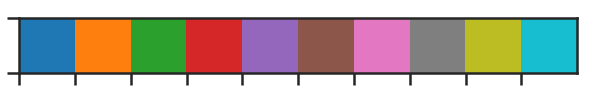

In [2]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(250/2) ;
nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+50) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [3]:
def hemap(an):
    RE_sorted=flipud(an[4])
    sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
    #plt.gca().set_xticks([])
    plt.gca().set_xticks([0,an[4].shape[1]/2, an[4].shape[1]])
    plt.gca().set_xticklabels(['0', str(an[4].shape[1]), str(an[4].shape[1]*2)], rotation=0)
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    plt.gca().set_yticklabels(['0','90','180', '270', '360'])
    plt.gca().set_xlabel('time (ms)');

In [ ]:
fee=1.09
fei=1.27
fie=0.96
fii=0.33

on2= model(totalTime= 2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=62, tauE=20, tauI=10,  n_stims=2, I0E=-6., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=3.25, sigI=2.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=12.5, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=3.9, phantom_onset=50000, phnatom_duration=100)

hemap(on2)
on2[1]

0.3

In [ ]:

fee=1.09
fei=1.27
fie=0.96
fii=0.33

on3= model(totalTime= 2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=62, tauE=20, tauI=10,  n_stims=2, I0E=-1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=3.25, sigI=2.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=12.5, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=3.9, phantom_onset=50000, phnatom_duration=100)

hemap(on3)
on3[1]

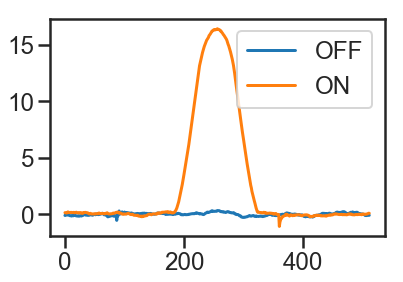

In [416]:
N=512
PA_off = pd.DataFrame(on2[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_off == max(PA_off)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_off_rolled = np.roll(PA_off, to_roll)


PA_on = pd.DataFrame(on3[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_on == max(PA_on)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_on_rolled = np.roll(PA_on, to_roll)

plt.plot(PA_off_rolled, label='OFF')
plt.plot(PA_on_rolled, label='ON')
plt.legend()

-59.67

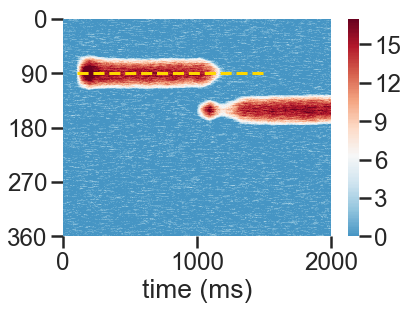

In [376]:
fee=1.087
fei=1.045
fie=1.42
fii=1.01
on2= model(totalTime= 2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=62, tauE=20, tauI=10,  n_stims=2, I0E=-1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=3.25, sigI=2.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=12.5, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=3.9, phantom_onset=50000, phnatom_duration=100)

hemap(on2)
on2[1]

-62.9

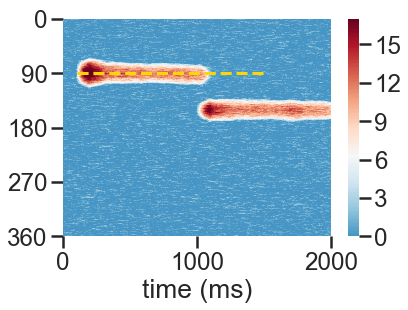

In [375]:
fee=1.089
fei=1.045
fie=1.42
fii=1.01

on3= model(totalTime= 2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=62, tauE=20, tauI=10,  n_stims=2, I0E=-6., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=3.25, sigI=2.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=12.5, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=3.9, phantom_onset=50000, phnatom_duration=100)

hemap(on3)
on3[1]

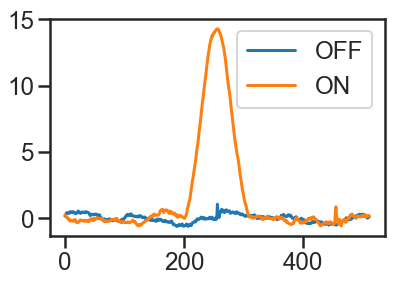

In [326]:
N=512
PA_off = pd.DataFrame(on3[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_off == max(PA_off)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_off_rolled = np.roll(PA_off, to_roll)


PA_on = pd.DataFrame(on2[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_on == max(PA_on)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_on_rolled = np.roll(PA_on, to_roll)

plt.plot(PA_off_rolled, label='OFF')
plt.plot(PA_on_rolled, label='ON')
plt.legend()